## import necessary libraries

In [20]:
import numpy as np
import skfuzzy as fuzz
import gymnasium as gym
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

## run and test Pendulum environment

You Won in 72 iterations!!!


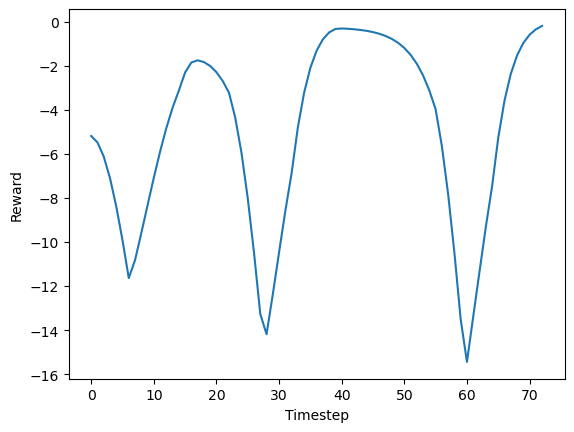

In [22]:
# Create the Pendulum environment
env = gym.make('Pendulum-v1', render_mode="human")
# env = gym.make('Pendulum-v1')

rewards = []

# Observe the state of the arm
observation, info = env.reset()
# print(observation) # [ 0.9996891 -0.0249333 -0.6036923]

for i in range(500):
    x = observation[0]
    y = observation[1]
    a_v = observation[2]

    # Compute the output torque
    # torque_value = np.random.uniform(-2.0, 2.0)
    if x < 0:
        if a_v < 0: # a_v is angular velocity
            torque_value = -2.0
        else:
            torque_value = 2.0
    else: # x >= 0
        if a_v < 0:
            torque_value = 2.0
        else:
            torque_value = -2.0

    # Apply the torque to the environment
    observation, reward, terminated, truncated, info = env.step([torque_value])

    # Render the environment
    env.render()

    # Track rewards
    rewards.append(reward)

    if terminated:
        print(f'You Won in {i} iterations!')
        break

    # Make it easier to win
    if observation[0] > 0.99 and abs(observation[2]) < 1.5:
        print(f'You Won in {i} iterations!!!')
        break

    # if truncated:
    #     observation, info = env.reset()

plt.plot(rewards)
plt.xlabel('Timestep')
plt.ylabel('Reward')
plt.show()

env.close()

## Define linguistic variables and membership functions

d:\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


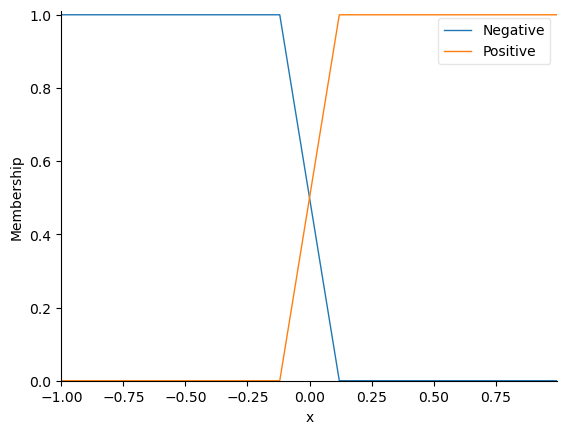

In [23]:
# define universe of x
x = ctrl.Antecedent(np.arange(-1.0, 1.0, 0.001), 'x') 

# the following membership functions are not wrok well
# x['Negative'] = fuzz.trapmf(x.universe, [-1.0, -1.0, -0.5, 0.0])
# x['Zero'] = fuzz.trimf(x.universe, [-0.5, 0, 0.5])
# x['Positive'] = fuzz.trapmf(x.universe, [0, 0.5, 1.0, 1.0])

# define membership functions
x['Negative'] = fuzz.trapmf(x.universe, [-1.0, -1.0, -0.12, 0.12]) 
x['Positive'] = fuzz.trapmf(x.universe, [-0.12, 0.12, 1.0, 1.0])

x.view()

In [12]:
### we don't need y to solve this problem
# y = ctrl.Antecedent(np.arange(-1.0, 1.0, 0.001), 'y')

# # y['Negative'] = fuzz.trapmf(y.universe, [-1.0, -1.0, -0.5, 0.0])
# # y['Zero'] = fuzz.trimf(y.universe, [-0.5, 0, 0.5])
# # y['Positive'] = fuzz.trapmf(y.universe, [0, 0.5, 1.0, 1.0])

# y['Negative'] = fuzz.trapmf(y.universe, [-1.0, -1.0, -0.12, 0.12])
# y['Positive'] = fuzz.trapmf(y.universe, [-0.12, 0.12, 1.0, 1.0])

# y.view()

d:\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


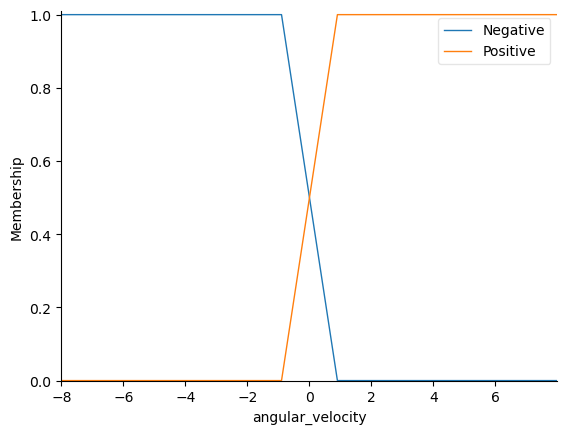

In [24]:
# define universe of angular velocity
angular_velocity = ctrl.Antecedent(np.arange(-8.0, 8.0, 0.001), 'angular_velocity')

# the following membership functions are not work well
# angular_velocity['Negative'] = fuzz.trapmf(angular_velocity.universe, [-8.0, -8.0, -4.0, 0.0])
# angular_velocity['Zero'] = fuzz.trimf(angular_velocity.universe, [-4.0, 0, 4.0])
# angular_velocity['Positive'] = fuzz.trapmf(angular_velocity.universe, [0, 4.0, 8.0, 8.0])

# define membership functions
angular_velocity['Negative'] = fuzz.trapmf(angular_velocity.universe, [-8.0, -8.0, -0.9, 0.9])
angular_velocity['Positive'] = fuzz.trapmf(angular_velocity.universe, [-0.9, 0.9, 8.0, 8.0])

angular_velocity.view()

d:\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


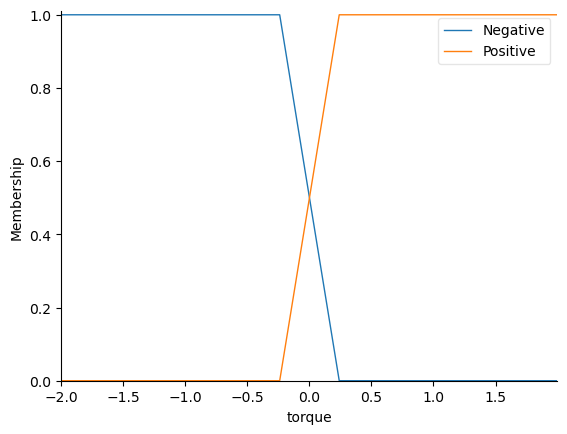

In [25]:
# define universe of torque
torque = ctrl.Consequent(np.arange(-2.0, 2.0, 0.001), 'torque')

# the following membership functions are not wrok well
# torque['Negative'] = fuzz.trapmf(torque.universe, [-2.0, -2.0, -0.5, 0])
# torque['Zero'] = fuzz.trimf(torque.universe, [-0.5, 0, 0.5])
# torque['Positive'] = fuzz.trapmf(torque.universe, [0, 0.5, 2.0, 2.0])

# define membership functions
torque['Negative'] = fuzz.trapmf(torque.universe, [-2.0, -2.0, -0.24, 0.24])
torque['Positive'] = fuzz.trapmf(torque.universe, [-0.24, 0.24, 2.0, 2.0])

torque.view()

## Define control rules

In [26]:
# define rules for the fuzzy system
rules = [
    # if x > 0 then decelerate (angular_velocity and torque have the opposite sign)
    ctrl.Rule(x['Positive'] & angular_velocity['Positive'], torque['Negative']),
    ctrl.Rule(x['Positive'] & angular_velocity['Negative'], torque['Positive']),
    # if x < 0 then accelerate (angular_velocity and torque have the same sign)
    ctrl.Rule(x['Negative'] & angular_velocity['Negative'], torque['Negative']),
    ctrl.Rule(x['Negative'] & angular_velocity['Positive'], torque['Positive']),
]

## Create a control system

In [27]:
control_system = ctrl.ControlSystem(rules)
simulation = ctrl.ControlSystemSimulation(control_system)

d:\anaconda3\lib\site-packages\skfuzzy\control\controlsystem.py:133: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


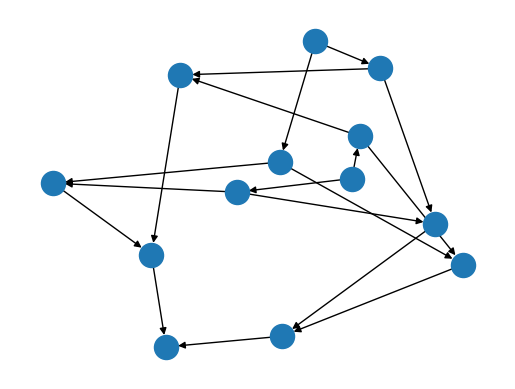

In [28]:
control_system.view()

## Run the simulation

In [34]:
# Create the Pendulum environment
env = gym.make('Pendulum-v1', render_mode="human")

rewards = []

# Observe the state of the arm
observation, _ = env.reset() # observation = [ 0.9996891 -0.0249333 -0.6036923]

for i in range(500):
    x = observation[0]
    y = observation[1]
    a_v = observation[2]

    # Set inputs for the fuzzy system
    simulation.input['x'] = x
    # simulation.input['y'] = y # we don't need y to solve this problem
    simulation.input['angular_velocity'] = a_v

    # Compute the output torque
    simulation.compute()
    torque_value = simulation.output['torque']

    # Apply the torque to the environment
    observation, reward, terminated, truncated, info = env.step([torque_value])

    # Render the environment
    env.render()

    # Track rewards
    rewards.append(reward)

    if terminated:
        print(f'You Won in {i} iterations!!!')
        break

    # Make it easier to win
    if observation[0] > 0.99 and abs(observation[2]) < 1.5:
        print(f'You Won in {i} iterations!!!')
        break
    
    # if truncated:
    #     observation, info = env.reset()

env.close()

You Won in 127 iterations!!!


## Visualize the rewards

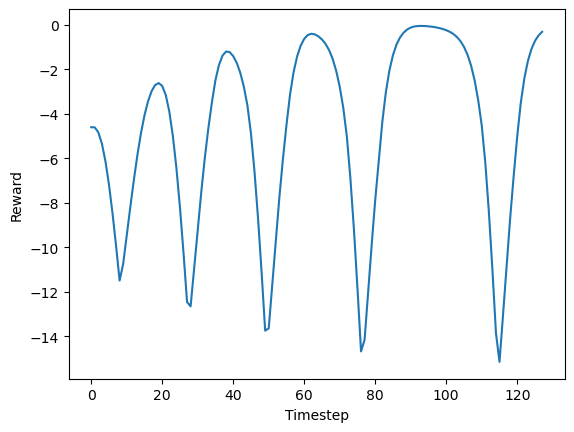

In [35]:
plt.plot(rewards)
plt.xlabel('Timestep')
plt.ylabel('Reward')
plt.show()

## Analyze the results and generate a report (to be implemented)